## Instruction for Running the notebook
There are 2 files that is uploaded in the D2l. The source of the data is `Yielding Behavior` that is collected by ourselves, but the file that I have used is `datamatin`. The difference is that I made the features that I wante to work with them binary in the second file. Here is the code to install some packages that we are going to use. There is neede to explain some differences between to files and also make you familiar with the data. We are going to work with 4 features : 'RRFB', 'crossing event type', 'roundabout entry or exit' and 'vehicle lane position wrt pedestrian' and our target that is the dependent varriable is "Subject Yielded"(1: Yielded, 0: Not yelded). RRFB is a sing that we put in the interaction part of vehicles and pedestrians that gives alert to reduce their speed. It i 3 cetegories:

na: it means that it is not present in that site

1: it means that it is on

0 : it means that it is present but it is off

in the `datamatin` file that it has made binary 0: off , 1: On, na: 2
The second feature is "Crossing event type" that it is in 3 categories of "Walking Bikes", "Riding" Bikes" and "Ped" that i made them binary as:

1: Peds

2: Riding Bikes

3: Walking Bikes

The third feature is "crossing event type" that shows that in each row of the data is a vehicle entering the roundabout or it is exiting and it has made binar as this:

1: entry

0: exit

The last feature is "vehicle lane position wrt pedestrian" Lane position of vehicle with respect to ped/bike when event started that is in 2 categories of Far lane, Near Lane and Left and it is made binary as this:

0: Far

Near: 1

In [32]:
!pip install scikit-learn
!pip install statsmodels

## Project Title: Yielding Behavior Toward People Walking and Biking at Roundabouts
It is a project that is going to predict that what items has the most effect on vehicles behavior toward bikes and pedstrian in roundabouts. Generally in new generation of roundabouts we do not have much signs or signals so we have to find a way that we can increase the rate of the yielding. Moreover, many of the accidents and specefically severity crashes is occured in roundabouts, so it is so important to study about that and make a decission about making some geometric changes or use from some signs

so, we have to anwer to this questions:

Which features are more effective in this situation?

How we can increase yielding rate by knowing the effective features?

## Methodology:
Here I am going to write a function that do the analysis with plots that I need. So, I can use it in future projects too. 

In the first step I am going to add the packages that I need during this project:

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

**In this step we are going to read the data. As I explained the instruction we are going to read datamatin file, because we are going to work with this file**

In [7]:
data = pd.read_excel("datamatin.xlsx", sheet_name = 'Data')

In [8]:
data.head()

,Dataset (1 or 0 Event),Crossing Event Number,Crossing Event Type (2/0/1),"Crossing Direction (C2I, I2C,C2ERI,ERI2C,ERI2I,I2ERI)",Roundabout 1 or 0,RRFB (na/On=1/Off=0),Subject Vehicle Number,Vehicle Lane Position (Left/Middle/Right/Exclusive Right),Vehicle Lane Position wrt 2estrian (0 lane/1 lane),Vehicle Position in Queue,"Vehicle Approaching From (For exiting vehicles only- Right turn, Other) (To be filled if Column J has Exit)",Subject Vehicle Behavior (1=Stop and yield/2=slow down and yield/3=slow down and not yield/4=did not yield at all),Subject Yielded,"Vehicle in Adjacent Lane (0=Not present/1=present but did not yield/2=present and stop2 or yielded, 3=yielded in adjacent lane separated by island) (To be filled if vehicle in adjacent lane arrives before or at the same time as subject vehicle)",2estrian Behavior (1=Wait for gap/2=wait for driver to yield/3=assert their ROW) (To be filled if Column F is Natural)
0,1,1,2,C2I,1,2,1,Left,0,1,na,4,0,0,0
1,1,2,0,C2I,1,2,2,Left,0,1,na,3,0,0,0
2,1,2,0,C2I,1,2,4,Right,1,1,na,2,1,2,0
3,1,3,0,C2I,0,2,5,Right,1,1,Right,4,0,0,0
4,1,4,0,C2I,0,2,6,Right,1,1,Right,1,1,0,0


In [9]:
data.columns

Index(['Dataset (1 or 0 Event)', 'Crossing Event Number',
       'Crossing Event Type (2/0/1)',
       'Crossing Direction (C2I, I2C,C2ERI,ERI2C,ERI2I,I2ERI)',
       'Roundabout 1 or 0', 'RRFB (na/On=1/Off=0)', 'Subject Vehicle Number',
       'Vehicle Lane Position (Left/Middle/Right/Exclusive Right)',
       'Vehicle Lane Position wrt 2estrian (0 lane/1 lane)',
       'Vehicle Position in Queue',
       'Vehicle Approaching From (For exiting vehicles only- Right turn, Other) (To be filled if Column J has Exit)',
       'Subject Vehicle Behavior (1=Stop and yield/2=slow down and yield/3=slow down and not yield/4=did not yield at all)',
       'Subject Yielded',
       'Vehicle in Adjacent Lane (0=Not present/1=present but did not yield/2=present and stop2 or yielded, 3=yielded in adjacent lane separated by island) (To be filled if vehicle in adjacent lane arrives before or at the same time as subject vehicle)',
       '2estrian Behavior (1=Wait for gap/2=wait for driver to yield/3=as

**In this step we are going to drop the features that we do not need them or have high correlation**

In [10]:
data=data[["Roundabout 1 or 0","Crossing Event Type (2/0/1)","RRFB (na/On=1/Off=0)","Vehicle Lane Position wrt 2estrian (0 lane/1 lane)","Subject Yielded"]]

In [11]:

data

,Roundabout 1 or 0,Crossing Event Type (2/0/1),RRFB (na/On=1/Off=0),Vehicle Lane Position wrt 2estrian (0 lane/1 lane),Subject Yielded
0,1,2,2,0,0
1,1,0,2,0,0
2,1,0,2,1,1
3,0,0,2,1,0
4,0,0,2,1,1
...,...,...,...,...,...
2820,0,0,2,1,0
2821,0,0,2,1,0
2822,0,0,2,1,1
2823,0,0,2,1,1


**Now we can start to make the logistic regression in the first step of that we are going to move 'Subject Yielded" to the last column and then we are going to make a function that first give a plot that shows the correlation of the features and then we are going to be prepared for the regression analysis. The code separates the DataFrame df into feature variables X (all columns except the last) and the target variable y (the last column).
The data is then split into training and testing sets, with 20% of the data reserved for testing. This is done to evaluate the model's performance on unseen data.
The add_constant function is applied to both training and testing feature sets to include an intercept in the logistic regression model, which is necessary for statistical modeling in statsmodels. the function aslo shows the result but I have copied that in the result section to give a report about that**

In [12]:
column_to_move = 'Subject Yielded'
column = data.pop(column_to_move)
data[column_to_move] = column

In [13]:
data

,Roundabout 1 or 0,Crossing Event Type (2/0/1),RRFB (na/On=1/Off=0),Vehicle Lane Position wrt 2estrian (0 lane/1 lane),Subject Yielded
0,1,2,2,0,0
1,1,0,2,0,0
2,1,0,2,1,1
3,0,0,2,1,0
4,0,0,2,1,1
...,...,...,...,...,...
2820,0,0,2,1,0
2821,0,0,2,1,0
2822,0,0,2,1,1
2823,0,0,2,1,1


In [14]:
def yielded(df):
    corr = df.corr()
    sns.heatmap(corr, annot=True)
    plt.show()
    print()
    print('*'*120)
    print()
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    model = sm.Logit(y_train, X_train).fit()
    print()
    print(model.summary())
    print('*'*120)
    print()
    y_pred = model.predict(X_test)
    y_pred = list(map(round, y_pred)) 
    cm_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    print(classification_report(y_test, y_pred))
    
    print()
    print('*'*120)
    print()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print('AUC is equal to: ',roc_auc)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for yielding')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

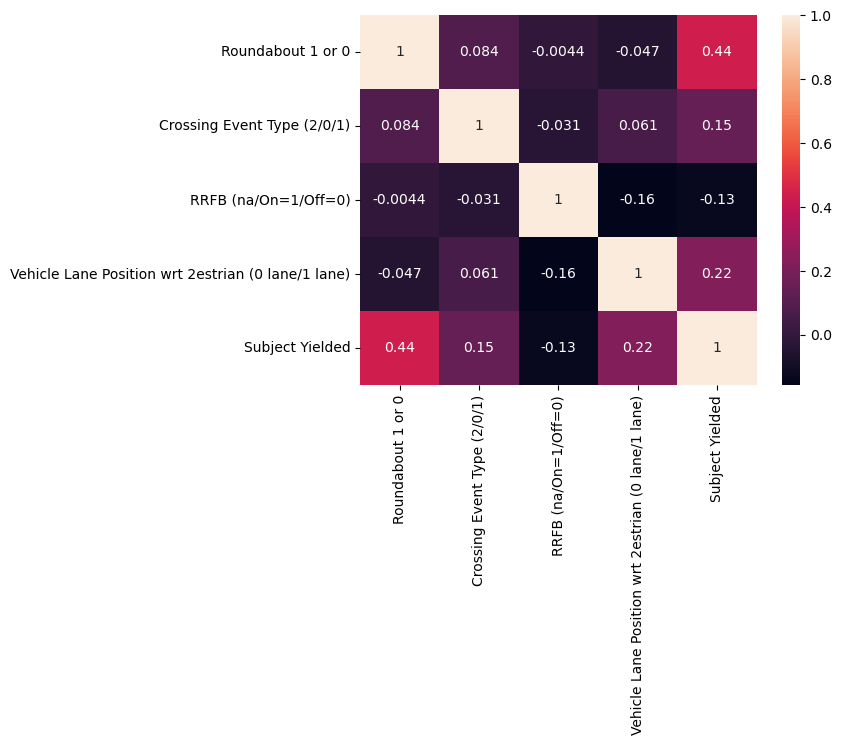


************************************************************************************************************************

Optimization terminated successfully.
         Current function value: 0.532616
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:        Subject Yielded   No. Observations:                 2260
Model:                          Logit   Df Residuals:                     2255
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.2175
Time:                        23:49:42   Log-Likelihood:                -1203.7
converged:                       True   LL-Null:                       -1538.4
Covariance Type:            nonrobust   LLR p-value:                1.554e-143
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

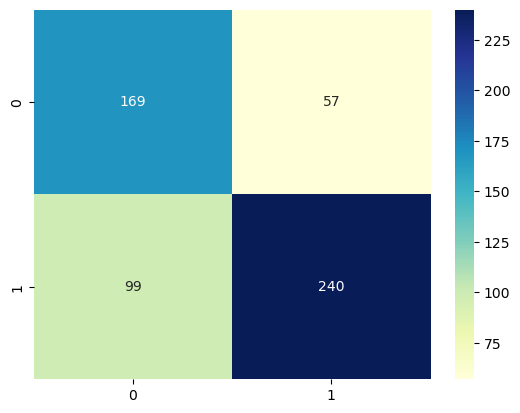

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       226
           1       0.81      0.71      0.75       339

    accuracy                           0.72       565
   macro avg       0.72      0.73      0.72       565
weighted avg       0.74      0.72      0.73       565


************************************************************************************************************************

AUC is equal to:  0.7278761061946902


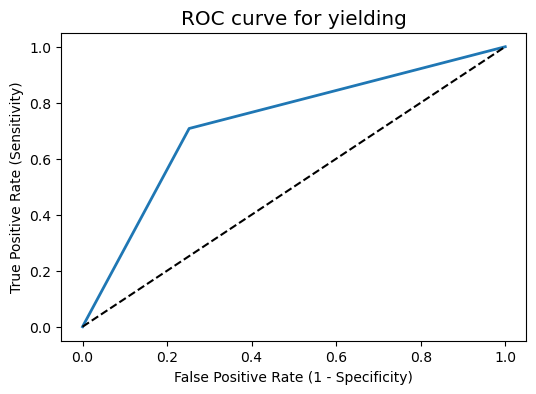

In [15]:
yielded(data)

## Result:
Now we are going ot take the result so we need to code to have the model summary to know about coefficinet, standard error and p-value to discuss about the result. After that we need to get the confusion matrix to know about True poitive, True negative, False positive nad false negative portion to evaluate the model.
In the next step we have to plot ROC curve to see how the model is performing. In the last, we are going to make a plot that shows that how the data is balanced. Because there are 16 sites and if the model is getting the data from some sites more we cannot trust the result

Optimization terminated successfully.
         Current function value: 0.532616
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:        Subject Yielded   No. Observations:                 2260
Model:                          Logit   Df Residuals:                     2255
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.2175
Time:                        23:57:28   Log-Likelihood:                -1203.7
converged:                       True   LL-Null:                       -1538.4
Covariance Type:            nonrobust   LLR p-value:                1.554e-143
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                      

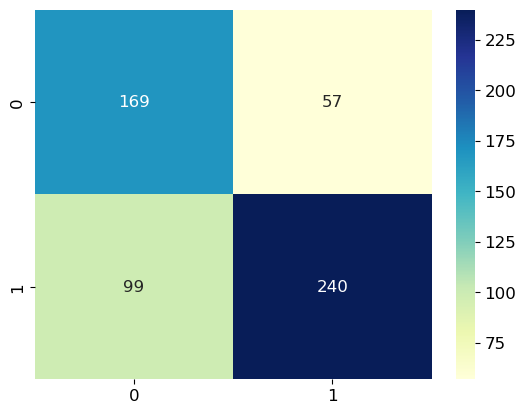

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       226
           1       0.81      0.71      0.75       339

    accuracy                           0.72       565
   macro avg       0.72      0.73      0.72       565
weighted avg       0.74      0.72      0.73       565


************************************************************************************************************************

AUC is equal to:  0.7278761061946902


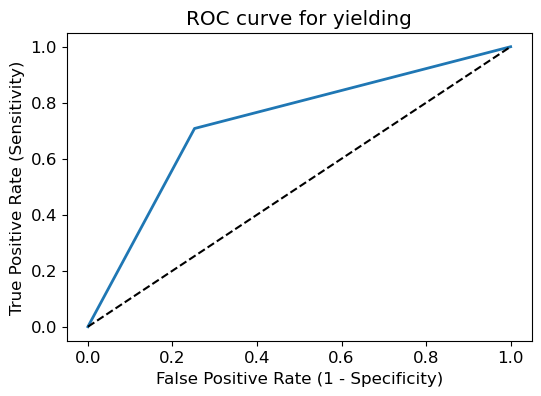

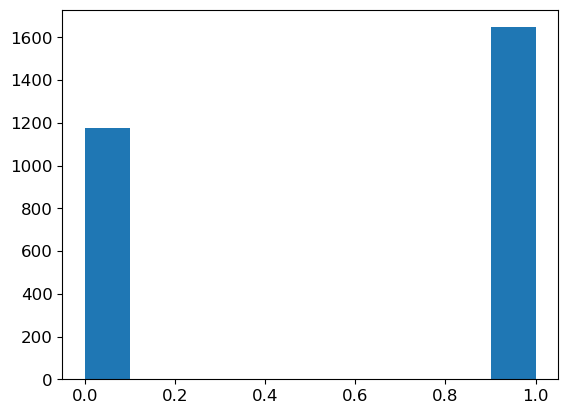

In [28]:
 model = sm.Logit(y_train, X_train).fit()
print()
print(model.summary())
print('*'*120)
print()
y_pred = model.predict(X_test)
y_pred = list(map(round, y_pred)) 
cm_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print(classification_report(y_test, y_pred))
    
print()
print('*'*120)
print()
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC is equal to: ',roc_auc)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for yielding')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
plt.hist(data['Subject Yielded']);

## Conclusion
As we can see in the summary p-value is 0 for all the features that it means that the probability of observing the data seen, or more extreme data, if the null hypothesis is true, is very small. As we can underdtand from the coefficient column RRFB sign and crossing event type('riding bike', 'walking bike', 'Pedestrian') are the least important items in the model and entering and exiting the roundabouts are the most effective item in the model. it shows that we need to make some geometric designs in roundabouts to solve this problem. We should make more offset beyond roundabout and exit corridors. Because most of the times when you want to enter a roundabout you want exit as soon as possible and most of the vehicles observe the pedestrians and bikes too late and it makes many accidents